**This notebook contains some inspiration from**

> https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis

> https://www.kaggle.com/code/chesellejanroldan/k-means-clustering-analysis-marketing-strategy

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for data analysis, modeling, and evaluation.
from tabulate import tabulate  #function can be used to convert data, such as lists or pandas DataFrames, into a formatted table
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

pd.set_option('display.max_columns',500) 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Chart for Null values in data
def nullchart(df):
    null_appDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    null_appDF.columns = ['Column Name', 'Null Values Percentage']
    fig = plt.figure(figsize=(18,6))
    ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color='blue')
    plt.xticks(rotation =90,fontsize =7)
    ax.axhline(40, ls='--',color='red')
    plt.title("Percentage of Missing values in data")
    plt.ylabel("Null Values PERCENTAGE")
    plt.xlabel("COLUMNS")
    plt.show()

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
def kmean_scatter(data, number):
    values = data.values
    columns = data.columns
    
    # Initialize an empty list to store the within-cluster sum of squares (inertia) values
    inertias = []

    # Define a range of n_clusters values to try
    n_clusters_range = range(1, 10)

    # Iterate over the range of n_clusters values
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++'
                    ,n_init='auto', max_iter=300, tol=0.0001, verbose=0
                    ,random_state=None, copy_x=True, algorithm='lloyd')
        kmeans.fit(values)
        inertias.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares values
    plt.figure(figsize=(20,3))
    plt.plot(n_clusters_range, inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.title('Elbow Method')
    plt.show();
    
    
    #number_clusters = int(input('How many clusters: '))
    number_clusters = number
    
    kmeans = KMeans(n_clusters=number_clusters, init='k-means++'
                    ,n_init='auto', max_iter=300, tol=0.0001, verbose=0
                    ,random_state=None, copy_x=True, algorithm='lloyd').fit(values)
    
    plt.figure(figsize=(10,7))                
    sns.scatterplot(values, x=values[:,0], y=values[:,1], hue=kmeans.labels_, legend=False, palette='colorblind')
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='Yellow', s=100, label='Centroids')
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show();
    return kmeans.labels_

# Data Exploration

In [3]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**No Null values found!**

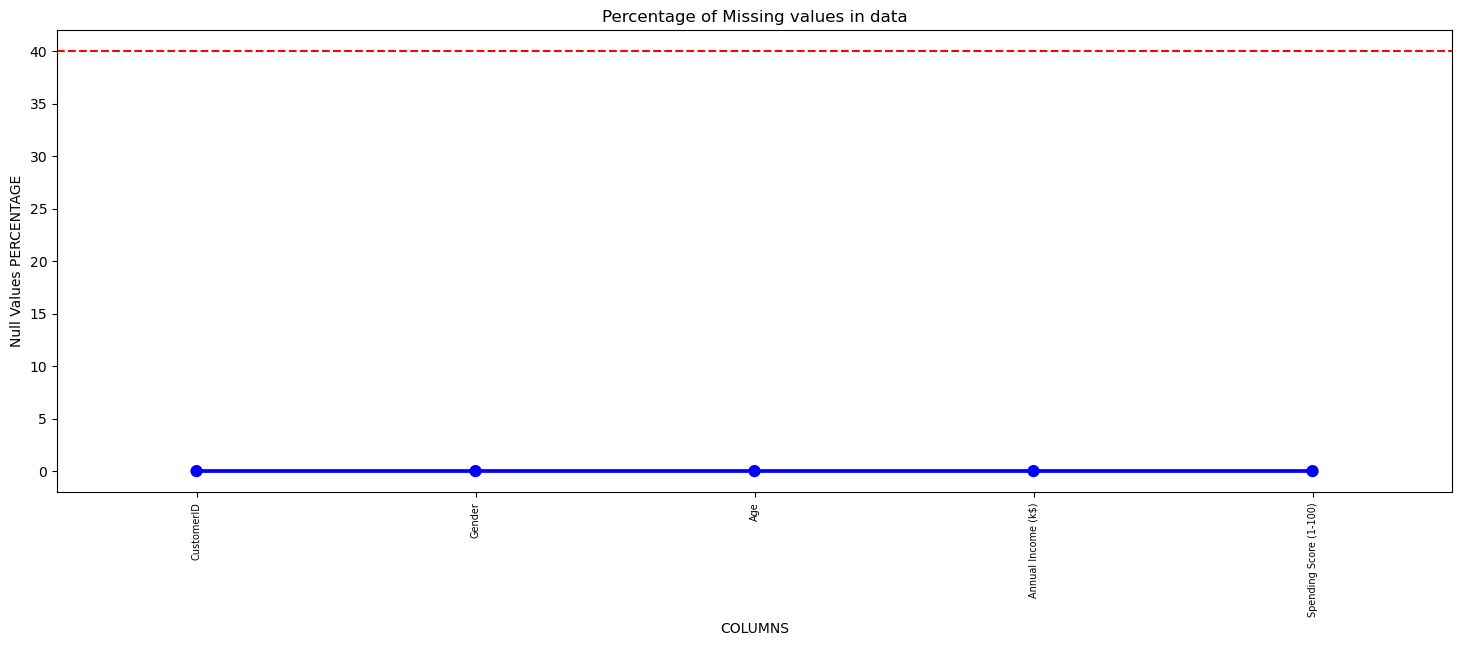

In [4]:
nullchart(data)

**All datatypes are correct!**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**there are 0 duplicated  rows and 5 columns in the subset of duplicated rows.**

In [7]:
data[data.duplicated()].shape

(0, 5)

**There are 200 unique CustomerId which equal to data's shape. There are spelling mistake in Gender column.******

In [8]:
def unique_columns(data):
    """
    Print number of unique values for each column in [data]
    """
    table = []
    for column in data.columns:
        table.append([column, len(data[column].unique()), data[column].dtype])
    
    print(tabulate(table, headers=["Column", "Number of Unique Values", "Dtype"], tablefmt="presto"))
unique_columns(data)

 Column                 |   Number of Unique Values | Dtype
------------------------+---------------------------+---------
 CustomerID             |                       200 | int64
 Gender                 |                         2 | object
 Age                    |                        51 | int64
 Annual Income (k$)     |                        64 | int64
 Spending Score (1-100) |                        84 | int64


# Data Visualization

In [9]:
df = data.drop('CustomerID', axis=1)

**Number of Female shoppers are more then Male**

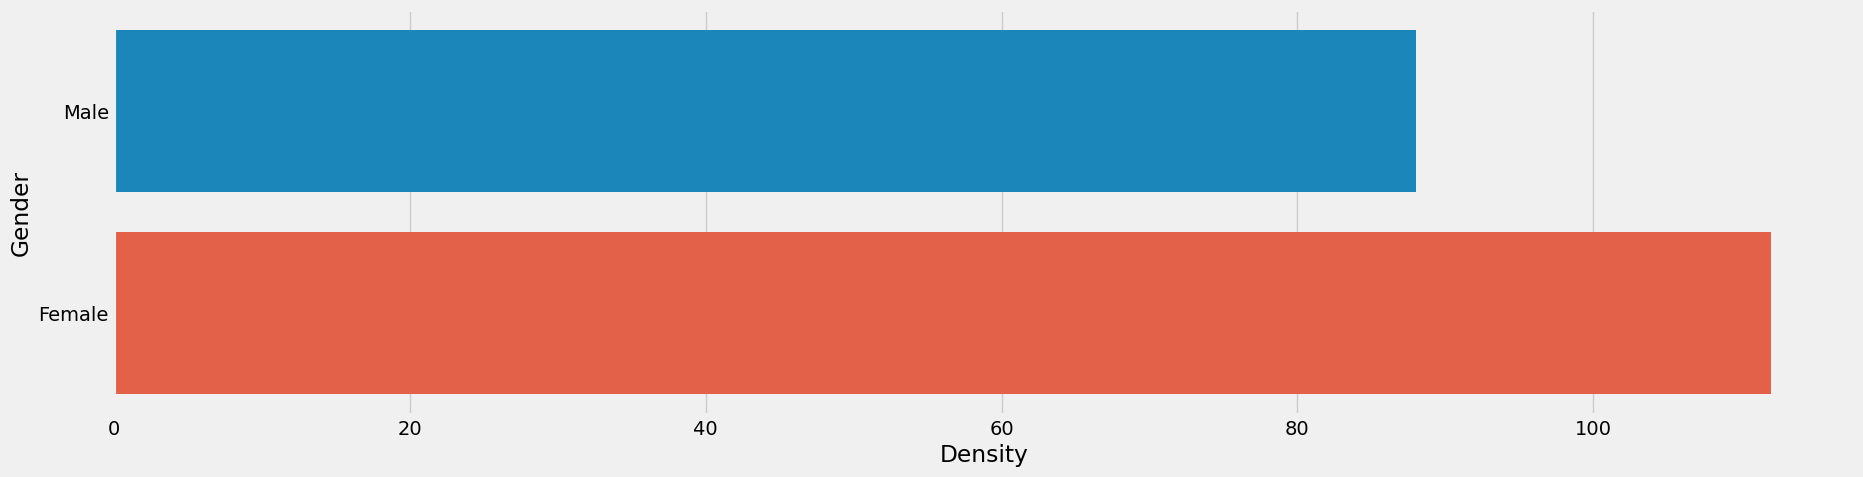

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Gender', data=df)
plt.xlabel("Density")
plt.show()

## Ploting the Relation between Age , Annual Income and Spending Score
**The pair plot analysis based on gender indicates that there are no clear clusters distinguishing between female and male customers. However, upon closer examination, it is worth noting that the scatter plots at the intersection of annual income and spending score exhibit some suggestive indications of clusters. Conversely, the scatter plots related to age show a more scattered distribution with no discernible clusters that can be observed through visual inspection.**

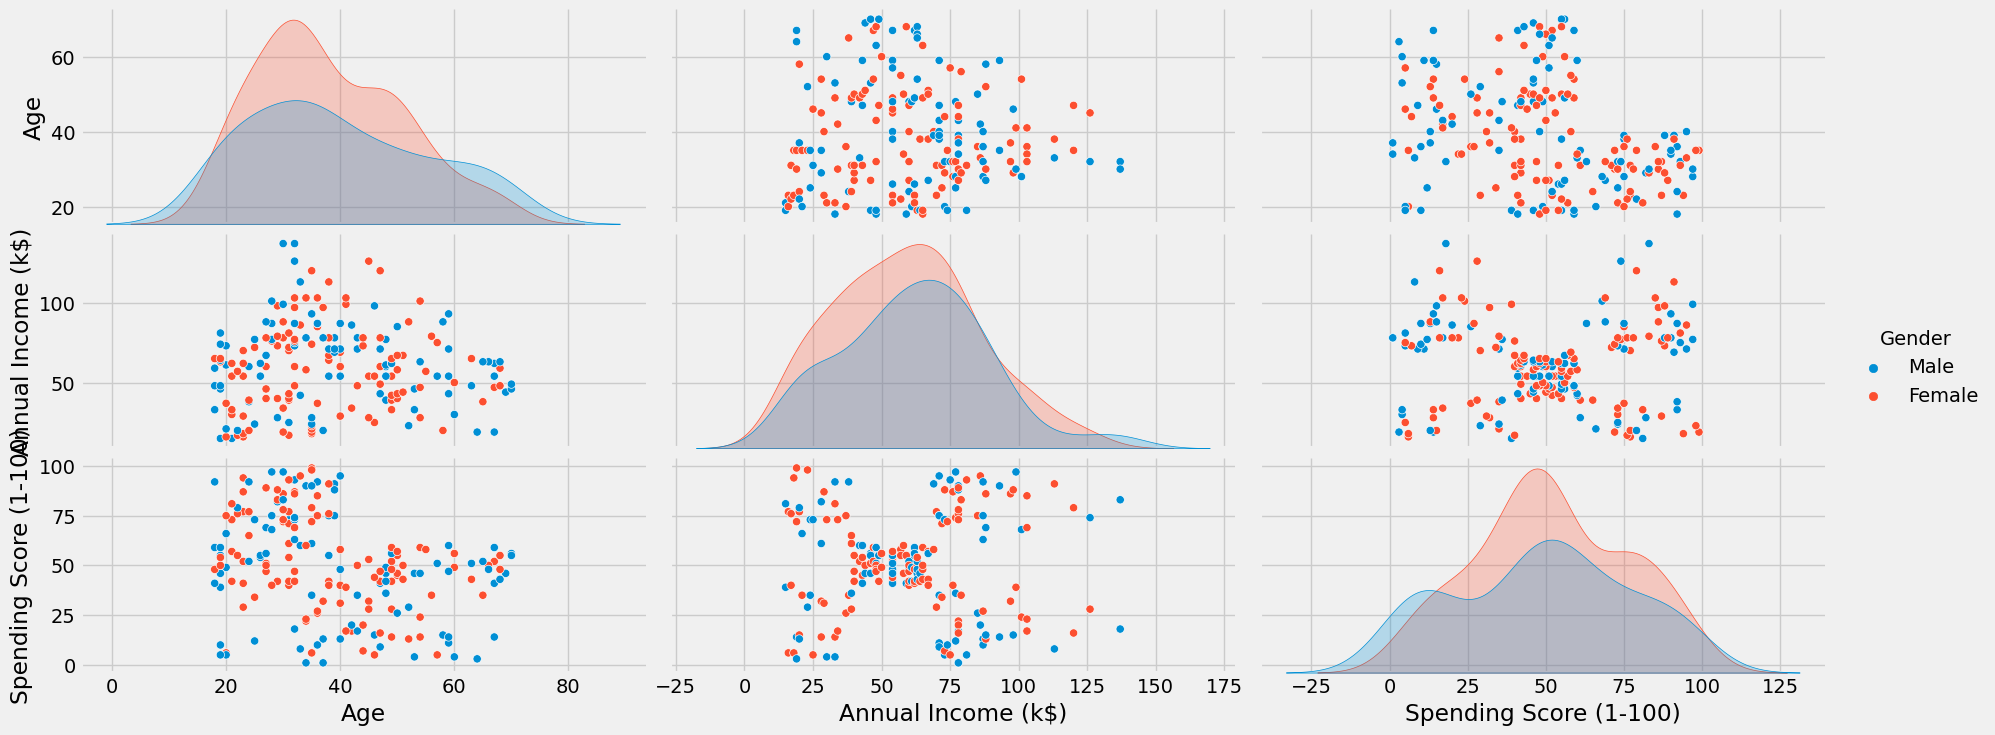

In [11]:
sns.pairplot(data=df, hue='Gender', aspect=2.5)
plt.show()

## Outlier
**There seems to be some outlier in Annual Income (k$)**

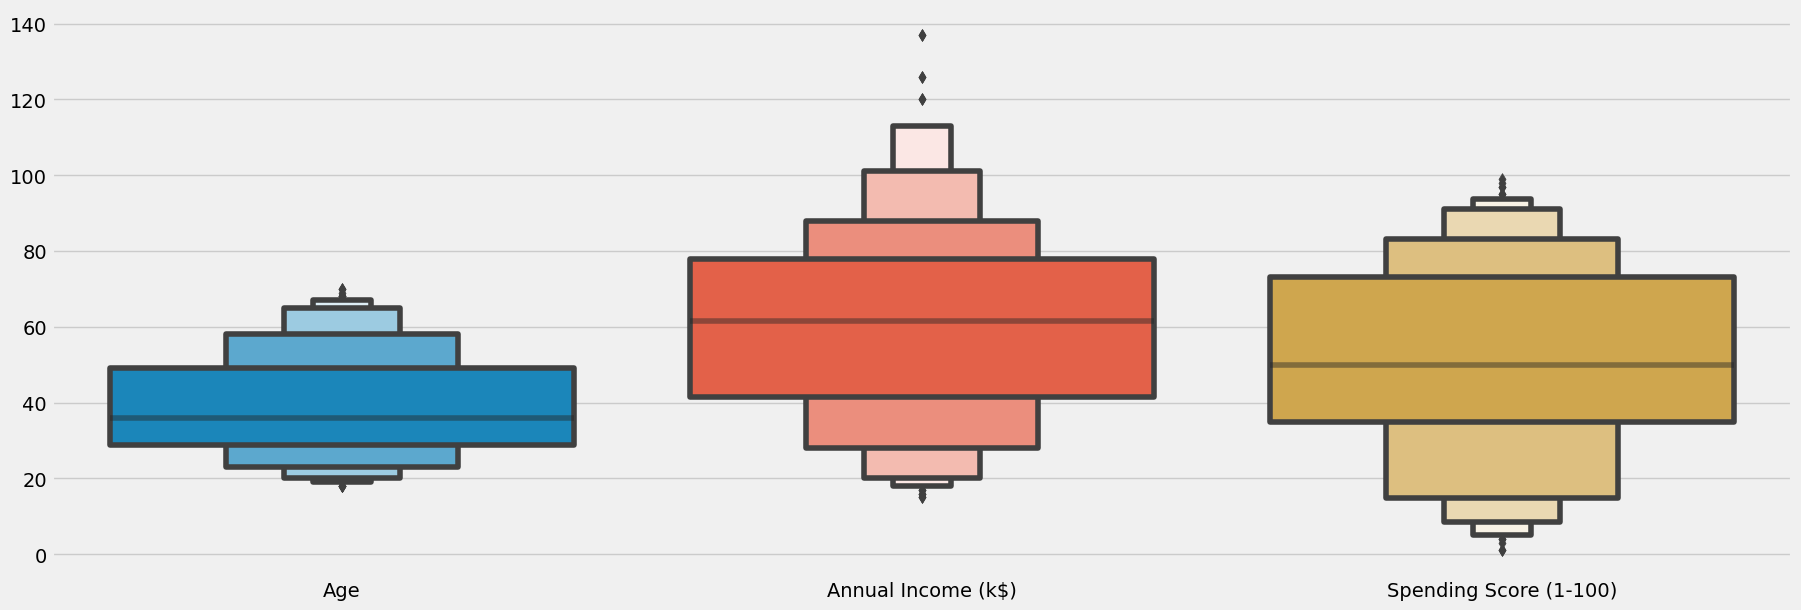

In [12]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxenplot(df)
plt.show()

**Upon examining the pair plot, it becomes evident that there are no substantial distinctions in the spending score and annual income between genders. Consequently, gender can be excluded from the features to be considered. Additionally, it is worth noting the identification of an outlier in the upper range of the Male Boxplot for Annual Income, which is also apparent in the box plot dedicated to annual income.**

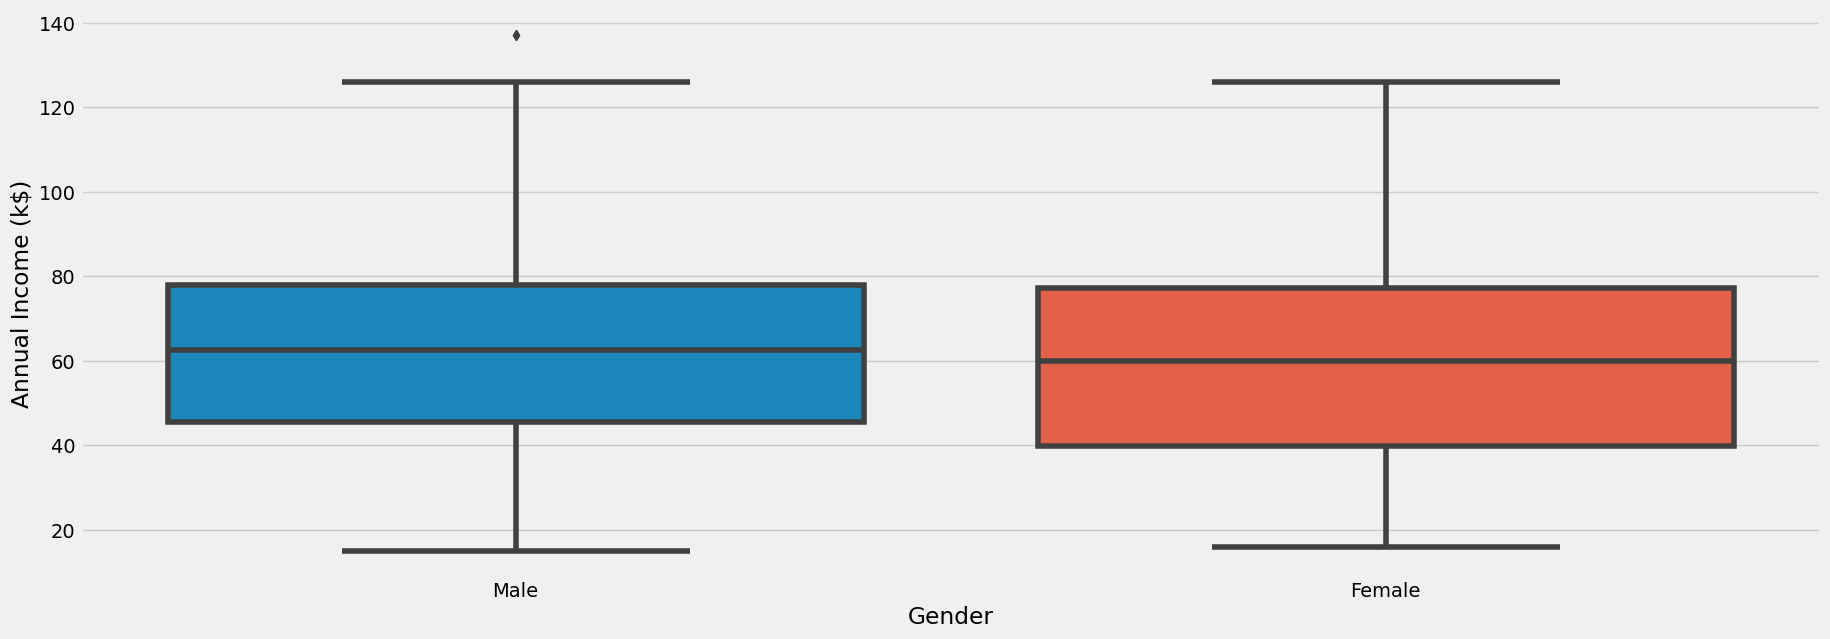

In [13]:
plt.figure(figsize=(20, 7))
sns.boxplot(df, x='Gender', y="Annual Income (k$)")
plt.show()

In [14]:
q1 = df['Annual Income (k$)'].quantile(.25)
q3 = df['Annual Income (k$)'].quantile(.75)

IQR = q3 - q1

print("Quartile Measurements for Annual Income")
print("1st Quartile: {} \n3rd Quartile: {} \nInter Quartile Range: {} \n".format(q1, q3, IQR))

upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

print("Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)")
print("Upper Limit: {} \nLower Limit: {} \n".format(upper_limit, lower_limit))

dataset = df.loc[(df['Annual Income (k$)'] <upper_limit) & (df['Annual Income (k$)'] > lower_limit)]
print('Total Outliers Removed: ',len(df)- len(dataset))

Quartile Measurements for Annual Income
1st Quartile: 41.5 
3rd Quartile: 78.0 
Inter Quartile Range: 36.5 

Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)
Upper Limit: 132.75 
Lower Limit: -13.25 

Total Outliers Removed:  2


**Mean for Male Annual Income have droped by almost 2**

In [15]:
print(tabulate(df.groupby(['Gender']).mean()[['Annual Income (k$)','Spending Score (1-100)']], headers='keys', tablefmt='fancy_grid'))
print(tabulate(dataset.groupby(['Gender']).mean()[['Annual Income (k$)','Spending Score (1-100)']], headers='keys', tablefmt='fancy_grid'))

╒══════════╤══════════════════════╤══════════════════════════╕
│ Gender   │   Annual Income (k$) │   Spending Score (1-100) │
╞══════════╪══════════════════════╪══════════════════════════╡
│ Female   │              59.25   │                  51.5268 │
├──────────┼──────────────────────┼──────────────────────────┤
│ Male     │              62.2273 │                  48.5114 │
╘══════════╧══════════════════════╧══════════════════════════╛
╒══════════╤══════════════════════╤══════════════════════════╕
│ Gender   │   Annual Income (k$) │   Spending Score (1-100) │
╞══════════╪══════════════════════╪══════════════════════════╡
│ Female   │              59.25   │                  51.5268 │
├──────────┼──────────────────────┼──────────────────────────┤
│ Male     │              60.4884 │                  48.4651 │
╘══════════╧══════════════════════╧══════════════════════════╛


**Upon closer inspection of shopping behavior, it appears that male and female customers exhibit similarities in terms of age, income, and spending patterns.**

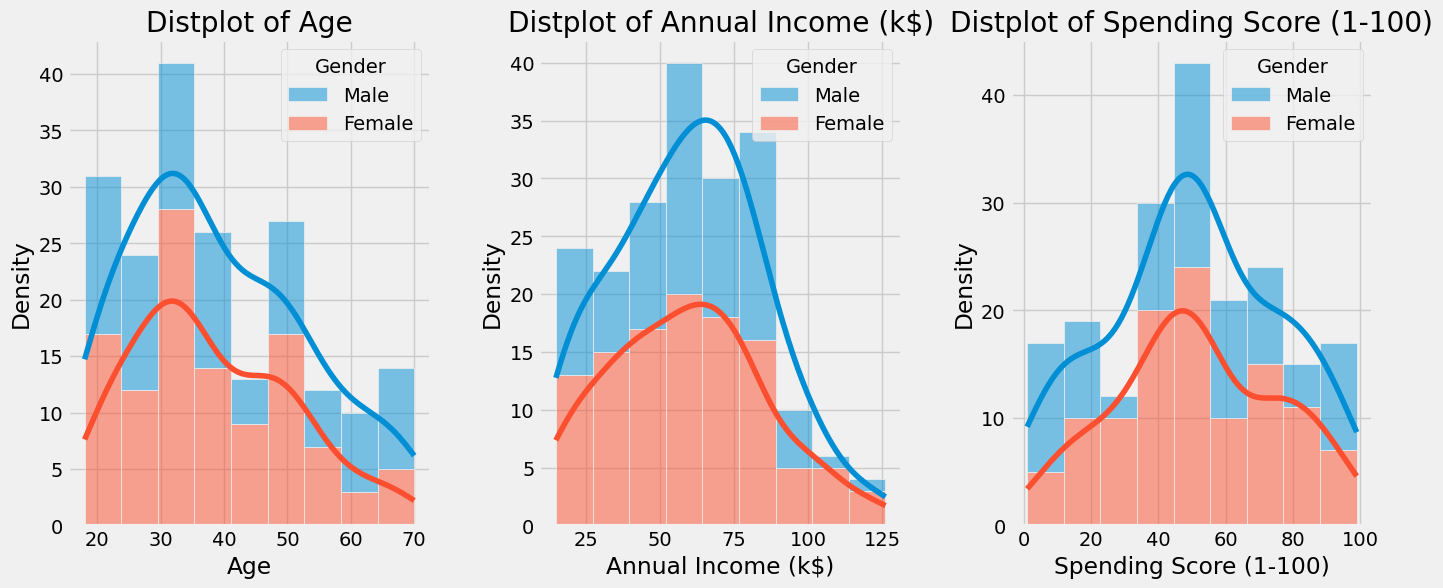

In [16]:
fig,ax = plt.subplots(1, 3, figsize=(15, 6))

for x, axis in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], ax):
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=dataset, x=x, kde=True, ax=axis, hue='Gender', multiple="stack")
    axis.set_title('Distplot of {}'.format(x))
    axis.set(ylabel="Density")
    
plt.show()

**The distribution plot for age, annual income, and spending score reveals that both age and annual income exhibit a right-skewed distribution. This observation suggests that the target audience for the mall primarily consists of young to middle-aged individuals. Furthermore, it is notable that the highest concentration of shoppers falls within the middle-class bracket in terms of income.**

**Considering the observed relationship between annual income and spending score in the pair plot, I will utilize the k-means algorithm to explore this correlation further. Additionally, I will investigate the relationship between age and spending score to gain additional insights.**

# Clustering using K- means
## 1.Segmentation using Age and Spending Score

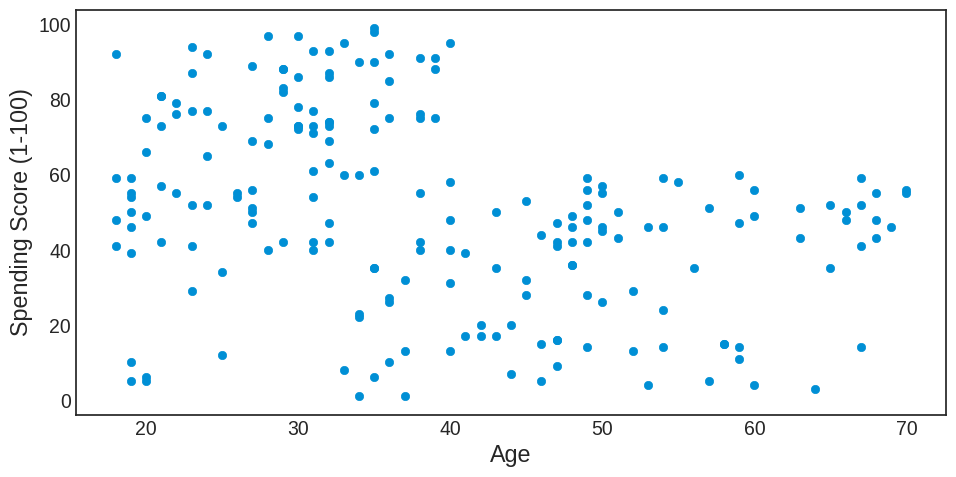

In [17]:
X_arr = dataset[['Age', 'Spending Score (1-100)']].values

X_df = dataset[['Age', 'Spending Score (1-100)']].copy()

plt.style.use('seaborn-v0_8-white')


plt.figure(figsize=(10, 5))
plt.scatter(x=X_arr[:,0], y=X_arr[:,1])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

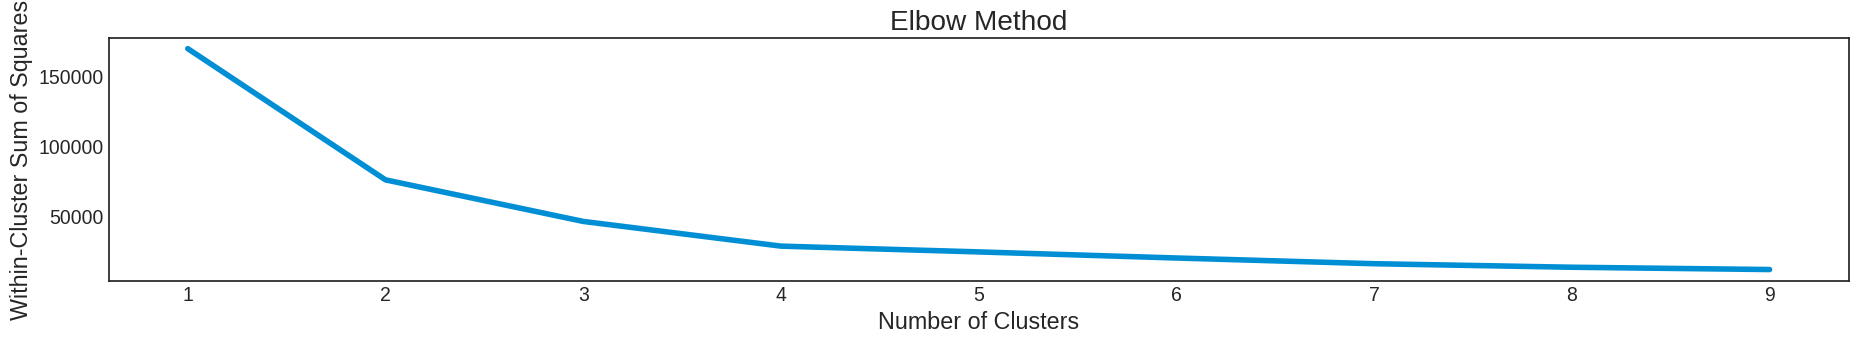

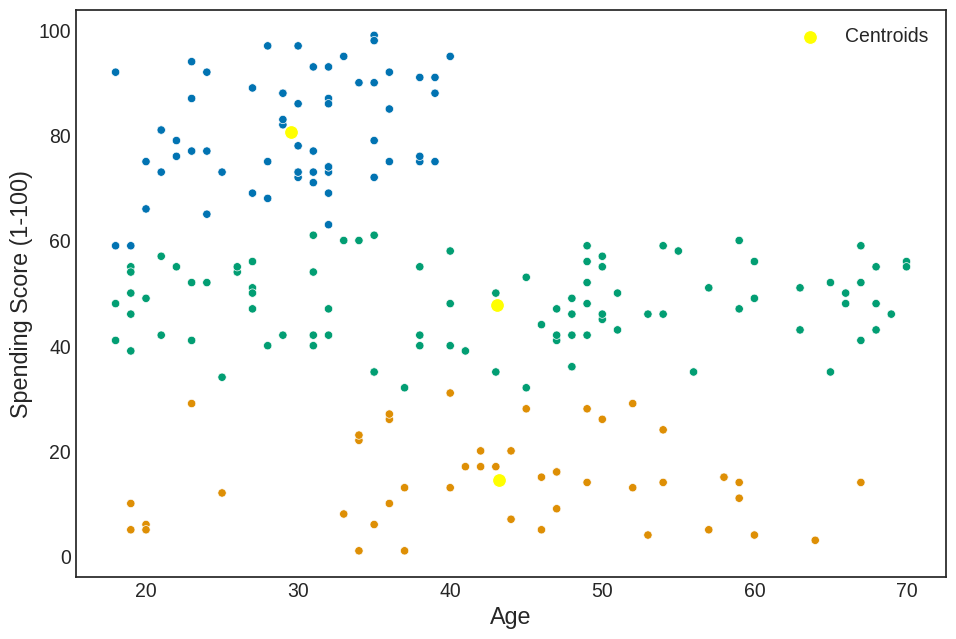

In [18]:
no = kmean_scatter(X_df, 3)

**The segmentation analysis uncovers that younger individuals generally exhibit a greater inclination for spending in comparison to those in middle or old age groups. However, it is worth noting the presence of a group across all ages that demonstrates the lowest level of spending.**

## 2. Segmentation using Annual Income and Spending Score¶


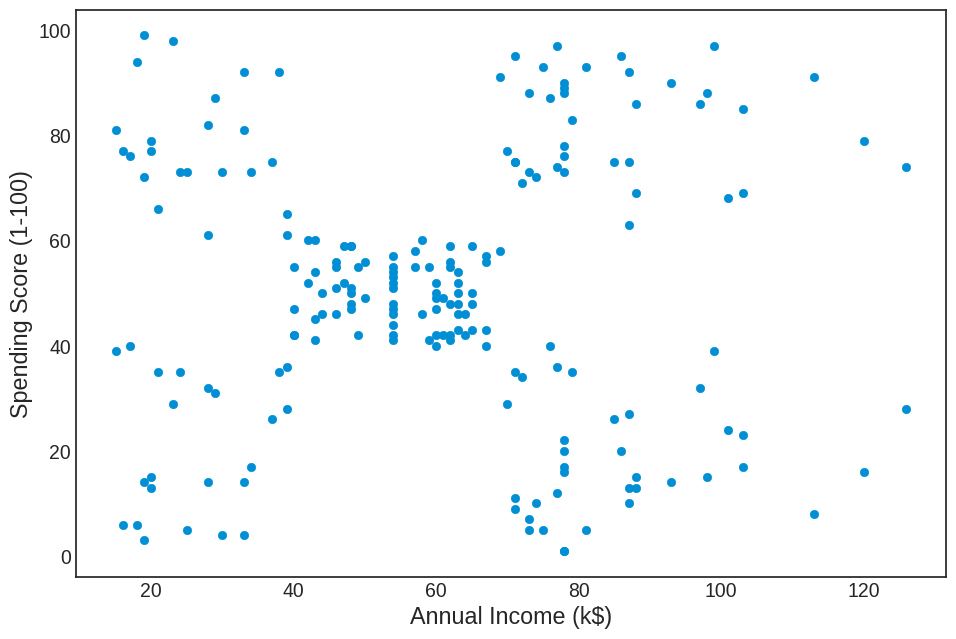

In [19]:
X_arr = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].copy()



plt.figure(figsize=(10, 7))
plt.scatter(x=X_arr[:,0], y=X_arr[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

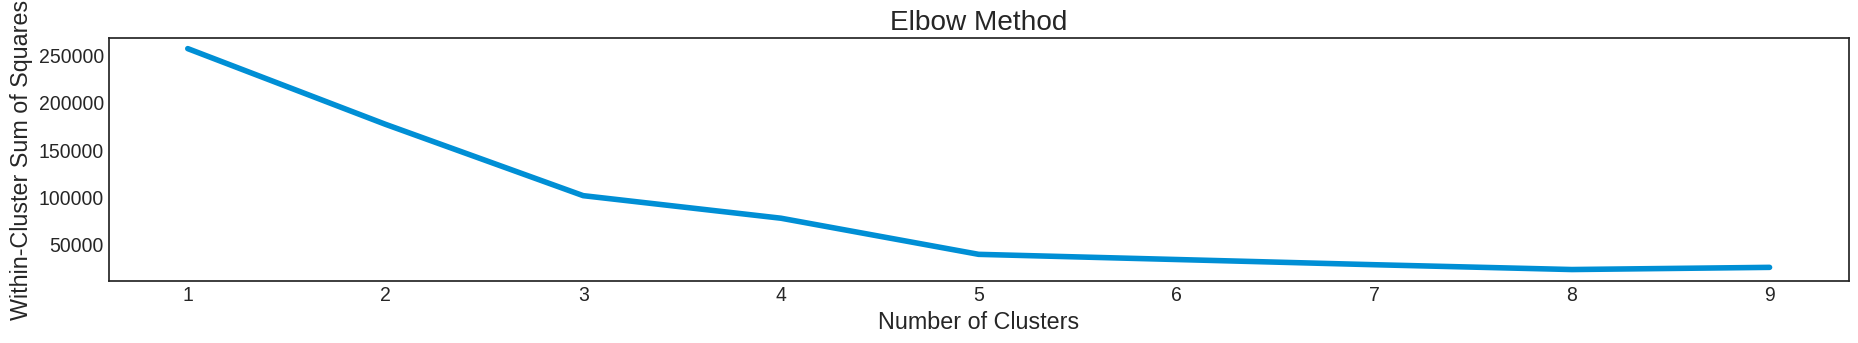

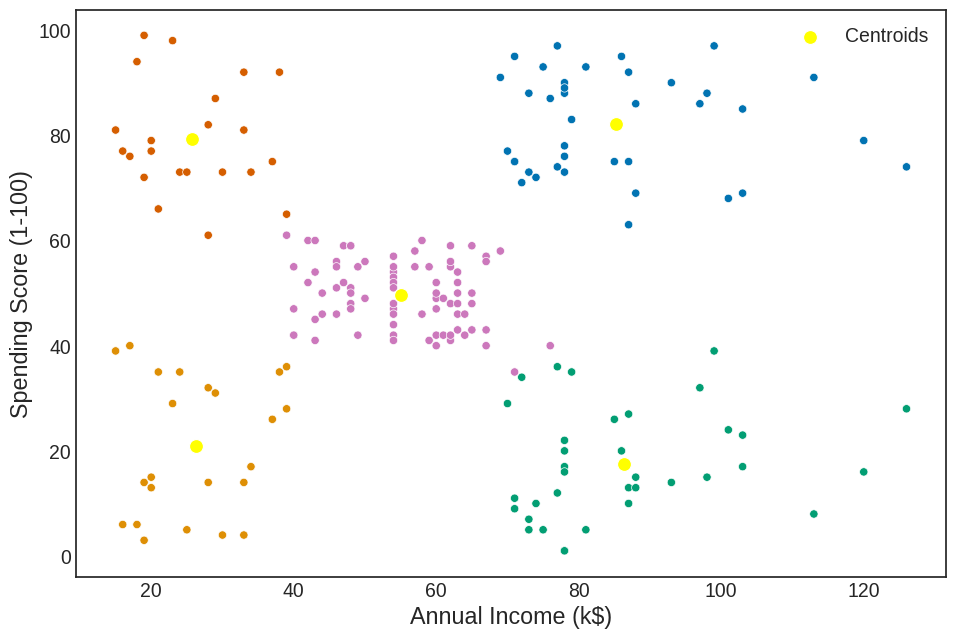

In [20]:
labels = kmean_scatter(X,5)

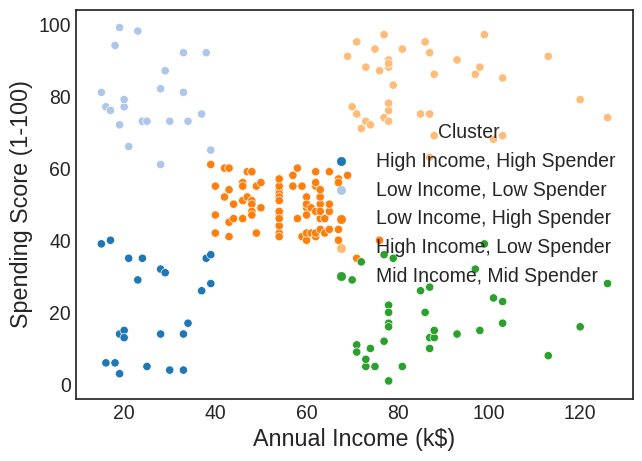

In [21]:
X_c = X.copy()
X_c.loc[:, 'labels'] = labels
X_c.labels.value_counts()

cluster = {0: 'High Income, Low Spender', 2: 'Mid Income, Mid Spender', 1: 'High Income, High Spender', 
          4: 'Low Income, High Spender', 3: 'Low Income, Low Spender'}

X_c['Cluster'] = X_c['labels'].map(cluster)
X_c.drop('labels', axis=1, inplace=True)

sns.scatterplot(data=X_c, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',  palette="tab20");

### Analysis & Strategy
The ***High-Income, High Spender*** cluster should be the top priority of the mall. They have the capacity for huge purchase sizes and higher purchase frequency, therefore it would make sense to offer this cluster with loyalty programs, specifically VIP-exclusive perks, as well as first access to high-ticket items, to retain their high spending behavior. In terms of approach, they should be emailed, texted, or messaged on new arrivals, exclusive items, and new stores. Considering their purchase capacity, they should receive upsell offers during their spending spree as much as possible.

The ***Low Income, High Spender*** cluster should be treated the same as High-Income, High Spender albeit with consideration of their income status. This cluster offers a steady cash flow and reliable inventory movement for the mall, that’s why they should be offered a loyalty program geared towards rewards. They should be contacted frequently on all possible communication platforms on upcoming sale as well as offers of low to mid-ticket items. To further progress their spending behavior, the mall should offer better credit terms and better payment accessibility, like digital transactions.

The goal for the ***Mid Income, Mid Spender*** cluster is to move them to the high spender category as much as possible. The income-sensitive offers accommodated for the Low Income, High Spender should be replicated for this cluster as well on the same rate of frequency and exposure until they are triggered to spend. To maximize their purchase capacity when their buy mode is activated, the mall should always go for an upsell.

The ***High Income, Low Spender*** cluster suggests that mallgoers under this cluster are thrifty. Considering their spending attitude and that they have considerable purchasing capacity, it would make sense to approach this cluster specifically with offers of bulk purchase discounts, packages that are aggregately cheaper (like an entertainment set that’s more expensive when sold separately), as well as event or holiday discounts for Christmas or Fathers’ day.

The ***Low Income, Low Spender*** cluster should be the lowest marketing priority considering their inherently limited purchase capacity. Investment of marketing resources in this cluster should only be attempted until all methods of persuasion on the first 4 clusters are exhausted or when the first 4 clusters have achieved offer fatigue.